# Install rdkit

using pypi or whatever install rdkit


In [1]:
!pip install rdkit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors

In [3]:
smiles = "CC(=O)NC1=CC=C(O)C=C1"

paracetamol = Chem.MolFromSmiles(smiles)


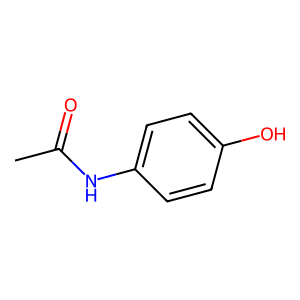

In [4]:
d = Draw.MolToImage(paracetamol)
d

In [5]:
paracetamol.GetNumAtoms()

11

We got 11 insted of 20 because rdkit counts only the "explicit" atoms responsible to define the structure of the molecule. The "implicit" atoms (such as H or C in our case) are not taken into account.

In [6]:
atoms = [atom.GetSymbol() for atom in paracetamol.GetAtoms()]
atoms

['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']

In [7]:
for bond in paracetamol.GetBonds():
    print(f"Bond between {bond.GetBeginAtom().GetSymbol()} and {bond.GetEndAtom().GetSymbol()} is {bond.GetBondType()}")

Bond between C and C is SINGLE
Bond between C and O is DOUBLE
Bond between C and N is SINGLE
Bond between N and C is SINGLE
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and O is SINGLE
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC
Bond between C and C is AROMATIC


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

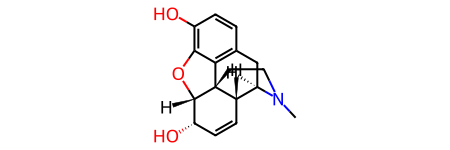

In [8]:
content = Chem.SDMolSupplier("notebook_2/DB00295.sdf")
morphine = content[0]

morphine

In [9]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(morphine, 2)
fp1


[10:40:50] DEPRECATION WARNING: please use MorganGenerator


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [10]:
paracetamol_smiles = "CC(=O)OC1=CC=CC=C1C(O)=O"
aspirin_smiles = "CC(=O)NC1=CC=C(O)C=C1"

paracetamol = Chem.MolFromSmiles(paracetamol_smiles)
aspirin = Chem.MolFromSmiles(aspirin_smiles)

paracetamol_fp = AllChem.GetMorganFingerprintAsBitVect(paracetamol, radius=2, nBits=1024)
aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, radius=2, nBits=1024)

fp1_np = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(paracetamol_fp, fp1_np)

fp2_np = np.zeros((1,), dtype=int)
DataStructs.ConvertToNumpyArray(aspirin_fp, fp2_np)

paracetamol_bit = DataStructs.CreateFromBitString(''.join(map(str, paracetamol_fp)))
aspirin_bit = DataStructs.CreateFromBitString(''.join(map(str, aspirin_fp)))

dice_similarity = DataStructs.DiceSimilarity(aspirin_bit, paracetamol_bit)

print(np.nonzero(fp1_np))
print(np.nonzero(fp2_np))
print(dice_similarity)


(array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017]),)
(array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)
0.37209302325581395


[10:40:50] DEPRECATION WARNING: please use MorganGenerator
[10:40:50] DEPRECATION WARNING: please use MorganGenerator


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [11]:
paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = Chem.MolFromSmiles(paracetamol_smiles)

attributes = [desc[0] for desc in Chem.Descriptors._descList]
desc_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(attributes)
desc_values = desc_calculator.CalcDescriptors(paracetamol)

for desc_name, desc_value in zip(attributes, desc_values):
    print(f"{desc_name}: {desc_value}")


MaxAbsEStateIndex: 10.524468537414966
MaxEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
MinEStateIndex: -0.11510204081632636
qed: 0.5950261967780848
SPS: 9.181818181818182
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
AvgIpc: 1.9291266251851134
BalabanJ: 2.7362980721056545
BertzCT: 241.2457497788808
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1:

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [12]:
molecule_list = Chem.SDMolSupplier("notebook_2/solubility.train.sdf", removeHs=False)


In [13]:
def calculate_descriptors(mol):
    attributes = [desc[0] for desc in Chem.Descriptors._descList]
    desc_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(attributes)
    desc_values = desc_calculator.CalcDescriptors(mol)
    
    return np.asarray(desc_values)


In [14]:
descriptors_list = [calculate_descriptors(mol) for mol in molecule_list]
df = pd.DataFrame(descriptors_list, columns=attributes)

df.head()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.4,72.151,60.055,72.09390,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.0,70.135,60.055,70.07825,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.0,86.178,72.066,86.10955,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


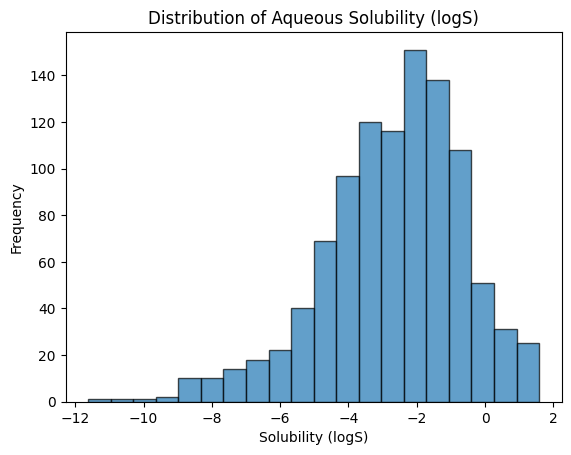

In [15]:
labels = [float(molecule.GetProp('SOL')) for molecule in molecule_list]
df["labels"] = labels

plt.hist(labels, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Aqueous Solubility (logS)")
plt.xlabel("Solubility (logS)")
plt.ylabel("Frequency")
plt.show()


Most molecules have a negative aqueous solubility (logS). This means that most of them are hydrophob.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [16]:
contains_nan = df.isna().values.any()
nb_nan_rows = 0
x = df.isna().sum(axis=1)

for a in x:
    if a > 0:
        nb_nan_rows += 1

print(f"Does the dataframe includes NaN values: {contains_nan}")
print(f"Nb of rows containing NaN values: {nb_nan_rows}")


Does the dataframe includes NaN values: True
Nb of rows containing NaN values: 1


In [17]:
df = df.dropna()
labels = df["labels"].to_list()

In [18]:
X = df.drop(columns=["labels"])
y = df["labels"]


In [19]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.7523654847247615


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [21]:
list_molecule_test = Chem.SDMolSupplier("notebook_2/solubility.test.sdf", removeHs=False)

descriptors_test_list = [calculate_descriptors(molecule) for molecule in list_molecule_test]
y_true = [float(molecule.GetProp('SOL')) for molecule in list_molecule_test]

descriptors_test_list[0]


array([ 2.27777778e+00,  2.27777778e+00,  9.35185185e-01,  9.35185185e-01,
        4.83890298e-01,  1.00000000e+01,  8.61780000e+01,  7.20660000e+01,
        8.61095504e+01,  3.80000000e+01,  0.00000000e+00, -4.48047100e-02,
       -6.51284736e-02,  6.51284736e-02,  4.48047100e-02,  1.16666667e+00,
        1.50000000e+00,  1.50000000e+00,  1.39452152e+01,  1.00800959e+01,
        1.88193668e+00, -1.98321310e+00,  2.02336303e+00, -1.84544499e+00,
        4.41007660e+00,  5.44063929e-01,  1.65002242e+00,  2.75418479e+00,
        1.92192809e+01,  4.99156383e+00,  4.99156383e+00,  4.99156383e+00,
        2.80806041e+00,  2.80806041e+00,  2.80806041e+00,  1.92166830e+00,
        1.92166830e+00,  1.39384685e+00,  1.39384685e+00,  2.88675135e-01,
        2.88675135e-01,  0.00000000e+00,  1.98002691e+01,  6.00000000e+00,
        3.20000000e+00,  2.25000000e+00,  4.05639616e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [22]:
scaler_test = MinMaxScaler()
descriptors_test_list = scaler.fit_transform(descriptors_test_list)

df = pd.DataFrame(descriptors_test_list, columns=attributes)
df


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.013228,0.013228,0.540830,0.882711,0.446847,0.065972,0.045926,0.031109,0.046039,0.084112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012283,0.012283,0.506024,0.873820,0.466478,0.084821,0.072722,0.054496,0.072824,0.112150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.099802,0.099802,0.666667,0.914854,0.388661,0.023090,0.015279,0.007722,0.015402,0.046729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
3,0.012519,0.012519,0.763052,0.939475,0.336737,0.252894,0.038224,0.031109,0.038335,0.065421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.094955,0.094955,0.530120,0.879976,0.384696,0.006597,0.011428,0.007722,0.011550,0.037383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.664145,0.664145,0.069432,0.609472,0.694254,0.758681,0.478185,0.444217,0.478131,0.485981,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.730365,0.730365,0.035177,0.484909,0.333309,0.086863,0.661402,0.654516,0.661356,0.616822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.713957,0.713957,0.005830,0.485188,0.000000,0.677040,1.000000,0.946643,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.708084,0.708084,0.001208,0.158552,0.489371,0.137942,0.825024,0.797737,0.823910,0.738318,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
y_pred = model.predict(df)
result_df = pd.DataFrame({"y_pred": y_pred, "y_true": y_true})

result_df


,y_pred,y_true
0,0.502567,-3.68
1,-1.633173,-4.26
2,2.945551,-2.68
3,2.882379,-2.59
4,5.177932,-2.09
...,...,...
252,-8.901966,-5.66
253,-9.420406,-3.66
254,-15.895801,-0.50
255,-9.998684,-5.09


In [24]:
rmse = root_mean_squared_error(y_true=y_true, y_pred=y_pred)

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 4.999907437540789
